In [1]:
import numpy as np
import tensorflow as tf

## 0. 자동 미분

In [2]:
w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2 * y + 5
    return z

Metal device set to: Apple M1 Pro


2023-03-11 23:19:20.242085: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-11 23:19:20.242188: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
with tf.GradientTape() as tape:
    z = f(w)

            # 자동 미분 수행
gradients = tape.gradient(z, [w])
# w에 대해 미분한 값이 저장됨
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


## 1. in TensorFlow

In [4]:
# 학습할 가중치 변수 선언
w = tf.Variable(tf.random.normal([1], name="weight"))
b = tf.Variable(tf.random.normal([1], name="bias"))

In [5]:
@tf.function
def hypothesis(x):
    return w * x + b

In [6]:
# cost/Loss function
@tf.function
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

In [7]:
optimizer = tf.optimizers.SGD(learning_rate=0.01)

In [8]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [24]:
for step in range(2000):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x에 대한 예측값
        y_pred = hypothesis(x)
        
        cost = mse_loss(y_pred, y)
    
    # 손실 함수에 대한 파라미터의 미분값 계산
    gradients = tape.gradient(cost, [w, b])
    
    # 파마리터 업데이트
    optimizer.apply_gradients(zip(gradients, [w, b]))
    
    if step % 10 == 0:
        print(step, w.numpy(), b.numpy(), cost.numpy())
        # print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4f} | cost : {:5.6f}".format(step, w.numpy(), b.numpy(), cost.numpy()))

0 [10.680612] [0.8226839] 1.0599403
10 [10.680721] [0.8219934] 1.0599343
20 [10.680826] [0.8213307] 1.0599308
30 [10.680927] [0.8206946] 1.059923
40 [10.681024] [0.82008445] 1.0599228
50 [10.681117] [0.81949884] 1.0599148
60 [10.681207] [0.81893677] 1.0599144
70 [10.681293] [0.8183974] 1.0599085
80 [10.681375] [0.8178795] 1.0599071
90 [10.681454] [0.81738263] 1.0599043
100 [10.681529] [0.8169057] 1.0599
110 [10.6816025] [0.81644815] 1.0599028
120 [10.681672] [0.8160089] 1.0598959
130 [10.681739] [0.8155875] 1.059898
140 [10.681803] [0.8151831] 1.0598933
150 [10.681865] [0.81479496] 1.0598959
160 [10.681924] [0.8144224] 1.0598916
170 [10.681981] [0.8140652] 1.0598931
180 [10.682035] [0.813722] 1.0598882
190 [10.682088] [0.8133928] 1.0598918
200 [10.6821375] [0.8130769] 1.0598848
210 [10.682186] [0.81277394] 1.0598888
220 [10.682232] [0.8124829] 1.0598856
230 [10.682277] [0.8122036] 1.0598866
240 [10.68232] [0.81193566] 1.0598848
250 [10.68236] [0.81167835] 1.0598866
260 [10.6824] [0.811

In [25]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.19723  54.222225 59.56389  64.90555 ]


2023-03-11 23:28:50.466415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## 2. in Keras

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [27]:
x_train = [1, 2, 3, 4, 5]
y_train = [2.1, 3.1, 4.1, 5.1, 6.1]

tf.model = tf.keras.Sequential()

# units == output shape, input_dim == input 
# 선형 회귀이므로 activation은 'linear'
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1, activation='linear'))

In [28]:
# SGD = Standard Gradient Descendent
sgd = tf.keras.optimizers.SGD(learning_rate = 0.01)

In [29]:
# mse = mean squared error
tf.model.compile(optimizer=sgd, loss="mse", metrics=['mse'])

In [30]:
tf.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [40]:
# fit() executes training
# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 400번 시도
tf.model.fit(x_train, y_train, epochs=400)

Epoch 1/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072
Epoch 2/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072
Epoch 3/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0071 - mse: 0.0071
Epoch 4/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0071 - mse: 0.0071
Epoch 5/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0070 - mse: 0.0070
Epoch 6/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0070 - mse: 0.0070
Epoch 7/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0069 - mse: 0.0069
Epoch 8/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0069 - mse: 0.0069
Epoch 9/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0068 - mse: 0.0068
Epoch 10/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0068 - mse: 0.0068
Epoch 11/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0067 

1/1 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022
Epoch 177/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022
Epoch 178/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022
Epoch 179/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022
Epoch 180/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021
Epoch 181/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021
Epoch 182/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021
Epoch 183/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021
Epoch 184/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021
Epoch 185/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021
Epoch 186/400
1/1 [==============================] - 0s 6ms/step - loss: 0

1/1 [==============================] - 0s 6ms/step - loss: 7.0149e-04 - mse: 7.0149e-04
Epoch 346/400
1/1 [==============================] - 0s 6ms/step - loss: 6.9676e-04 - mse: 6.9676e-04
Epoch 347/400
1/1 [==============================] - 0s 7ms/step - loss: 6.9206e-04 - mse: 6.9206e-04
Epoch 348/400
1/1 [==============================] - 0s 6ms/step - loss: 6.8739e-04 - mse: 6.8739e-04
Epoch 349/400
1/1 [==============================] - 0s 5ms/step - loss: 6.8274e-04 - mse: 6.8274e-04
Epoch 350/400
1/1 [==============================] - 0s 6ms/step - loss: 6.7814e-04 - mse: 6.7814e-04
Epoch 351/400
1/1 [==============================] - 0s 7ms/step - loss: 6.7356e-04 - mse: 6.7356e-04
Epoch 352/400
1/1 [==============================] - 0s 7ms/step - loss: 6.6901e-04 - mse: 6.6901e-04
Epoch 353/400
1/1 [==============================] - 0s 7ms/step - loss: 6.6449e-04 - mse: 6.6449e-04
Epoch 354/400
1/1 [==============================] - 0s 6ms/step - loss: 6.6001e-04 - mse: 6.600

1/1 [==============================] - 0s 19ms/step


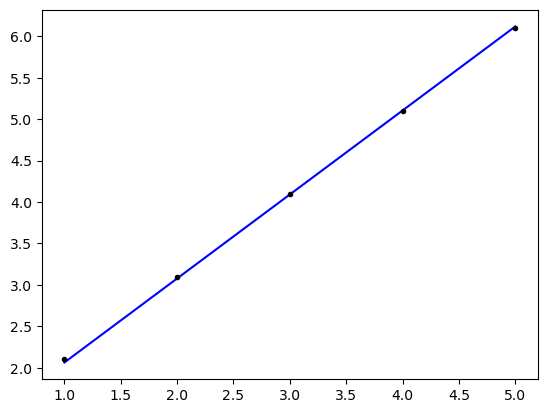

In [42]:
plt.plot(x_train, tf.model.predict(x_train), "b", x_train, y_train, "k.")

In [43]:
# predict() returns predicted value
y_predict = tf.model.predict(np.array([5, 4]))
print(y_predict)

1/1 [==============================] - 0s 12ms/step
[[6.119768]
 [5.105543]]
